Demonstrating the process of Bootstrapping in reinforcement Learning 


Bootstrapping in reinforcement learning refers to the process of updating a value estimate for a state or state-action pair by using not only the immediate reward but also the value of subsequent states (future estimates).


in simple Bootstrapping is a sampling method in reinforcement learning (RL) that uses individual observations to estimate the statistics of a population. It's a core principle in RL that involves updating value estimates based on a combination of actual rewards and predicted future rewards.

Some of the Aspects are 
TD also known as Temporal difference is One of the most well-known methods that employs bootstrapping. In TD learning, the value of a state is updated based on the estimate of the value of the next state. This is done without waiting for the final reward (as in Monte Carlo methods) but instead using a combination of observed reward and the current estimate of future states.

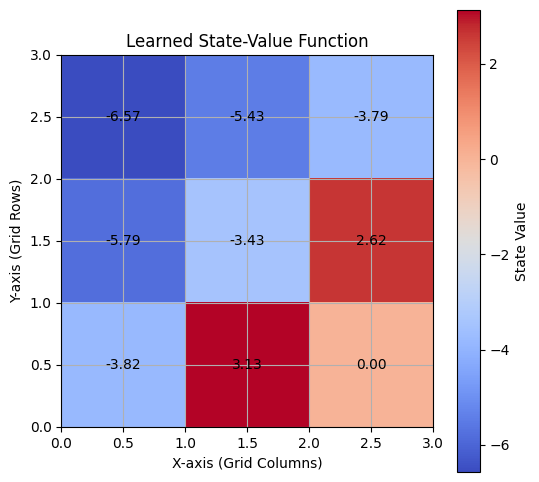

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Grid world setup
grid_size = 3
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
episodes = 500  # Number of episodes
start_state = (0, 0)
goal_state = (2, 2)

# Initialize state-value function
V = np.zeros((grid_size, grid_size))

# Define rewards
def get_reward(state):
    return 10 if state == goal_state else -1

# Define possible actions
actions = ['up', 'down', 'left', 'right']

# Transition function
def get_next_state(state, action):
    i, j = state
    if action == 'up':
        return (max(0, i - 1), j)
    elif action == 'down':
        return (min(grid_size - 1, i + 1), j)
    elif action == 'left':
        return (i, max(0, j - 1))
    elif action == 'right':
        return (i, min(grid_size - 1, j + 1))
    return state

# TD(0) learning
for episode in range(episodes):
    state = start_state
    while state != goal_state:
        # Choose an action randomly (random policy)
        action = random.choice(actions)
        
        # Get next state and reward
        next_state = get_next_state(state, action)
        reward = get_reward(next_state)
        
        # Update state-value using TD(0)
        V[state] += alpha * (reward + gamma * V[next_state] - V[state])
        
        # Transition to next state
        state = next_state

# Plotting the state-value function
plt.figure(figsize=(6, 6))
plt.imshow(V, cmap='coolwarm', origin='upper', extent=[0, grid_size, 0, grid_size])
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j + 0.5, grid_size - i - 0.5, f"{V[i, j]:.2f}", 
                 ha='center', va='center', color='black')
plt.colorbar(label='State Value')
plt.title('Learned State-Value Function')
plt.xlabel('X-axis (Grid Columns)')
plt.ylabel('Y-axis (Grid Rows)')
plt.grid()
plt.show()
